### Assignment solution as part of the application for CherISH DC10 position

**Exercise 1.** Create a NumPy array that contains a periodic signal, which is generated from the sum of two sine and two cosine functions. The frequency and amplitude of the sine and cosine components are arbitrary.

In [55]:
import numpy as np
import matplotlib.pyplot as plt


# frequencies
f1, f2, f3, f4 = 1, 2, 3, 4

# amplitudes
a1, a2, a3, a4 = 1, 2, 3, 4

# time
t = np.linspace(0, 5, 500) 

sine1 = a1 * np.sin(2*np.pi*f1*t)
sine2 = a2 * np.sin(2*np.pi*f2*t)

cosine1 = a3 * np.cos(2*np.pi*f3*t)
cosine2 = a4 * np.cos(2*np.pi*f4*t)

signal = sine1 + sine2 + cosine1 + cosine2

**Exercise 2.** Plot the resulting signal with Matplotlib. Calculate the FFT components of the signal and plot them.

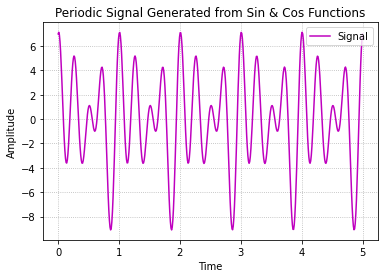

In [56]:
plt.figure(figsize=(6, 4))
plt.plot(t, signal, label='Signal', color='m')
plt.title('Periodic Signal Generated from Sin & Cos Functions')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()

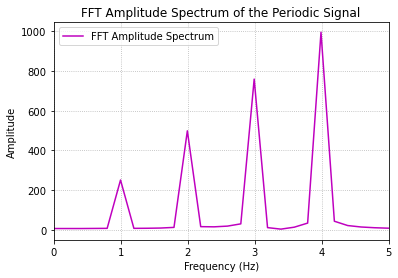

In [57]:
# Calculate the FFT of the signal

signal_fft = np.fft.fft(signal)
spacing = t[1] - t[0]
window_length = len(t)
freqs = np.fft.fftfreq(window_length, d=spacing)

# Plot with shifting the zero-frequency component to the center of the spectrum

plt.figure(figsize=(6, 4))
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(signal_fft)), label='FFT Amplitude Spectrum', color='m')
plt.title('FFT Amplitude Spectrum of the Periodic Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(linestyle='dotted')
plt.xlim(0, 5) 
plt.show()

**Exercise 3.** Add random noise to the original signal and redo the tasks of exercise 2

In [58]:
noise = np.random.normal(0, 1, len(t))  # Gaussian noise with mean 0 and standard deviation 1
noisy_signal = signal + noise

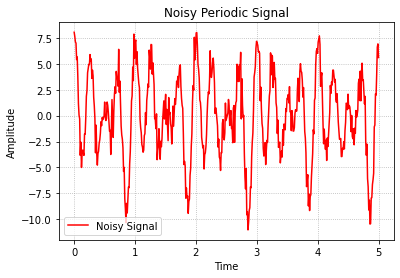

In [61]:
# Plot the noisy signal

plt.figure(figsize=(6, 4))
plt.plot(t, noisy_signal, label='Noisy Signal', color='r')
plt.title('Noisy Periodic Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(linestyle='dotted')
plt.show()

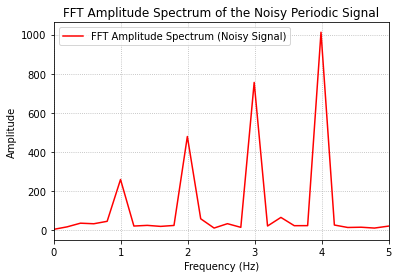

In [64]:
# Calculate the FFT of the noisy signal

noisy_signal_fft = np.fft.fft(noisy_signal)

plt.figure(figsize=(6, 4))
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(noisy_signal_fft)), label='FFT Amplitude Spectrum (Noisy Signal)', color='r')
plt.title('FFT Amplitude Spectrum of the Noisy Periodic Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(linestyle='dotted')
plt.xlim(0, 5) 
plt.show()

 **Exercise 4.** Standardize the original and the noisy signal to have zero mean and unit variance. Plot the resulting signals.

In [67]:
# Standardize the original signal

signal_mean = np.mean(signal)
signal_std = np.std(signal)
standardized_signal = (signal - signal_mean) / signal_std


# Standardize the noisy signal

noisy_signal_mean = np.mean(noisy_signal)
noisy_signal_std = np.std(noisy_signal)
standardized_noisy_signal = (noisy_signal - noisy_signal_mean) / noisy_signal_std


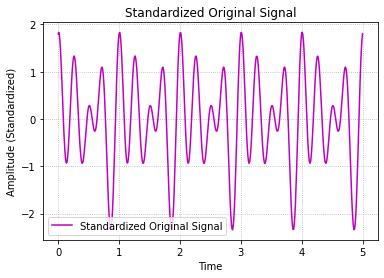

In [68]:
# Plot the standardized original signal

plt.figure(figsize=(6, 4))
plt.plot(t, standardized_signal, label='Standardized Original Signal', color='m')
plt.title('Standardized Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude (Standardized)')
plt.legend()
plt.grid(linestyle='dotted')
plt.show()

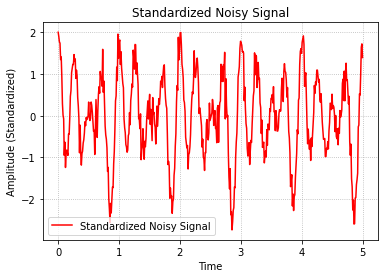

In [69]:
# Plot the standardized noisy signal

plt.figure(figsize=(6, 4))
plt.plot(t, standardized_noisy_signal, label='Standardized Noisy Signal', color='r')
plt.title('Standardized Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude (Standardized)')
plt.legend()
plt.grid(linestyle='dotted')
plt.show()

**Exercise 5:** Create a binaural auditory signal from the standardized noisy signal by spatializing the sound source at an arbitrary degree on the left from the center, at an arbitrary distance. <br>
**Exercise 6:** Calculate Interaural Time Difference (ITD) and Interaural Level Difference (ILD) for the binaural auditory signal.

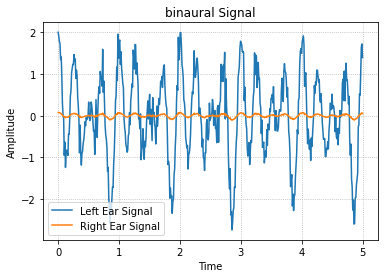

Interaural Time Difference (ITD): 0.000261122136632219 seconds
Interaural Level Difference (ILD): 28.149538982913924 dB


In [83]:
angle = 30  
angle_rad = np.radians(angle)
distance = 1 
speed_of_sound = 343
head_radius = 0.0875  # meters (average adult head)
sample_rate = len(t) / (t[-1] - t[0])
frequency = sample_rate / len(t)


# Calculate Interaural Time Difference (ITD) and Interaural Level Difference (ILD)
# Source of these equations: 
# https://pubs.aip.org/asa/jel/article/1/4/044402/219435/A-set-of-equations-for-numerically-calculating-the

itd = (head_radius / speed_of_sound) * (angle_rad + np.sin(angle_rad))
ild = head_radius * 2 * np.sqrt(frequency) * np.sin(angle_rad)

itd_samples = int(itd * sample_rate)

right_signal = np.roll(standardized_noisy_signal, -itd_samples) * ild
left_signal = standardized_noisy_signal

# Plot the left and right ear signals
plt.figure(figsize=(6, 4))
plt.plot(t, left_signal, label='Left Ear Signal')
plt.plot(t, right_signal, label='Right Ear Signal')
plt.title('binaural Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(linestyle='dotted')
plt.show()


print(f"Interaural Time Difference (ITD): {itd} seconds")

# Another method to calculate ILD in dB
# The ILD can be considered as the ratio of the amplitudes between the left and right ear signals. 
# We'll calculate this based on the average power (mean squared amplitude) of the signals.

left_power = np.mean(left_signal ** 2)
right_power = np.mean(right_signal ** 2)

# ILD in dB
ild_db = 10 * np.log10(left_power / right_power)
print(f"Interaural Level Difference (ILD): {ild_db} dB")


**Exercise 7:** Implement an auditory filter bank using gammatone filters.

**Exercise 8:** Process the binaural auditory signal components through the gammatone filter bank to obtain the impulse response for each component.

In [101]:
def gammatone_filter(t, center_freq, bandwidth):
    """
    Generate a gammatone filter response.
    
    Parameters:
        t: Time vector.
        center_freq: Center frequency.
        bandwidth: Bandwidth of the gammatone filter.
    
    Returns:
        numpy.ndarray: Gammatone filter response.
    """
    # source of equations https://en.wikipedia.org/wiki/Gammatone_filter
    # (t^3) to model human hearing
    
    envelope = t**3 * np.exp(-2 * np.pi * bandwidth * t)
    carrier = np.cos(2 * np.pi * center_freq * t)

    response = envelope * carrier
    
    return response

In [102]:
num_filters = 32  
low_freq = 100  
high_freq = 8000 

center_freqs = np.geomspace(low_freq, high_freq, num_filters)

# Calculate the Equivalent Rectangular Bandwidth (ERB) for each center frequency
# ERB formula: ERB(f) = 24.7 * (4.37 * f / 1000 + 1)
bandwidths = 24.7 * (4.37 * center_freqs / 1000 + 1)

# Generate the gammatone filter responses
filter_responses = np.array([gammatone_filter(t, cf, bw) for cf, bw in zip(center_freqs, bandwidths)])
filtered_signals_left = np.array([np.convolve(left_signal, fr, mode='same') for fr in filter_responses])
filtered_signals_right = np.array([np.convolve(right_signal, fr, mode='same') for fr in filter_responses])

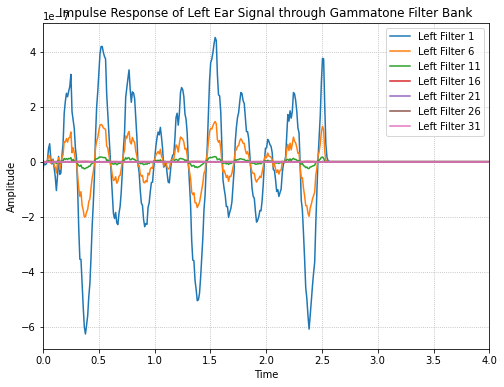

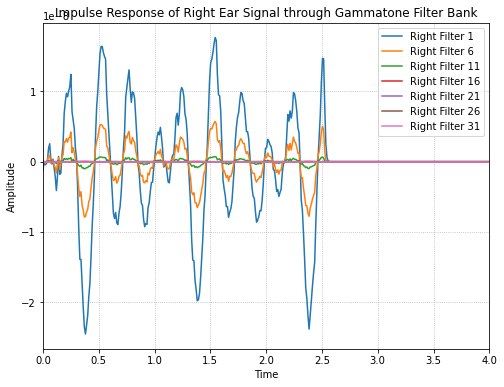

In [103]:
# Plot the impulse responses for a few gammatone filters

plt.figure(figsize=(8, 6))
for i in range(0, num_filters, 5):  # Plot every 5th filter output for clarity
    plt.plot(t, filtered_signals_left[i], label=f'Left Filter {i+1}')
plt.title('Impulse Response of Left Ear Signal through Gammatone Filter Bank')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(linestyle='dotted')
plt.xlim(0, 4)
plt.show()

plt.figure(figsize=(8, 6))
for i in range(0, num_filters, 5):  
    plt.plot(t, filtered_signals_right[i], label=f'Right Filter {i+1}')
plt.title('Impulse Response of Right Ear Signal through Gammatone Filter Bank')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(linestyle='dotted')
plt.xlim(0, 4)
plt.show()